In [37]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# generating some fake variable data for us to fit

In [15]:
def Sin(t, amp = 1.0, offset = 0.0, period = 1.0, phase = 0.0):
    y = np.sin(2*np.pi/period * (t-phase))
    return amp/2 * y + offset

def add_noise(x, amp=0.1):
    return np.asarray([i + (amp*(np.random.random()-0.5)) for i in x])

In [16]:
t = add_noise(np.arange(0,20,0.15))
mag = Sin(t, amp=0.85, period=0.13, phase=0.45)
err = np.zeros(len(t)) + 0.05

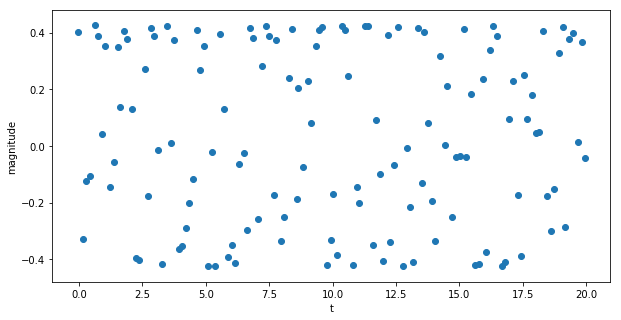

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(t, mag)
plt.xlabel('t')
plt.ylabel('magnitude');

# finding a estimate period

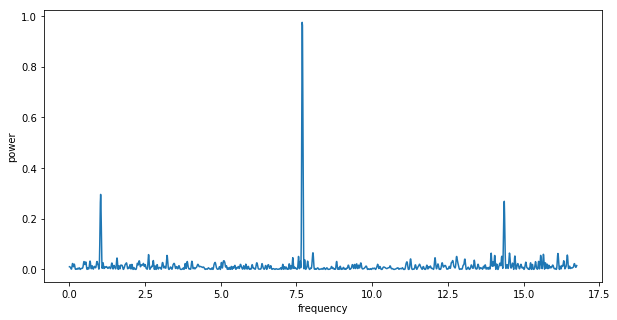

In [31]:
from astropy.stats import LombScargle

frequency, power = LombScargle(t, mag).autopower()

plt.figure(figsize=(10,5))
plt.plot(frequency, power)
plt.xlabel('frequency')
plt.ylabel('power');

In [99]:
period = 1./frequency[np.argmax(power)]

print ("guess period (1/frequency @ max of power spectrum):", period)

guess period (1/frequency @ max of power spectrum): 0.13007449231782328


# Fitting a function using scipy.optimization.curve_fit

First, we define a guess values for each of our model parameters in our function.

In [100]:
# amp = 1.0, offset = 0.0, period = 1.0, phase = 0.0
guess_parameter_values = np.array([1, 0, 0.13, 0])

Here, ```curve_fit``` takes in a function, the x values, the y values, and the guess parameters values.

In return, we are given parameter values and a covarience matrix. The estimated errors on our parameters are found by taking the square root of the diagonals of your covarience matrix.

Note, here we have given ```curve_fit``` fake y errors, which is really important to include when you work with your data.

In [112]:
curve_fit?

In [114]:
from scipy.optimize import curve_fit

fit = curve_fit(Sin, t, mag, guess_parameter_values, sigma=0.1*np.ones_like(t))
params, cov = fit
param_errs = np.sqrt(np.diagonal(cov))

In [105]:
amp, offset, period, phase = params
amp_err, offset_err, period_err, phase_err = param_errs

print ("amp :", amp, "\noffset :", offset, "\nperiod :", period, "\nphase :", phase)

amp : -0.8499999999780551 
offset : 2.4596718453363622e-11 
period : 0.13000000000000647 
phase : -0.005000000000209838


# How'd we do?

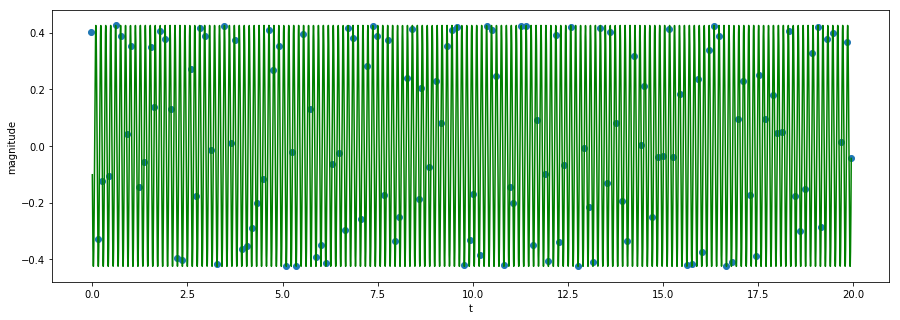

In [76]:
t_toplot = np.linspace(0, max(t), 10000)

plt.figure(figsize=(15,5))
plt.scatter(t, mag)
plt.plot(t_toplot, Sin(t_toplot, amp, offset, period, phase), 'g-')
plt.xlabel('t')
plt.ylabel('magnitude');

# covarience matrix

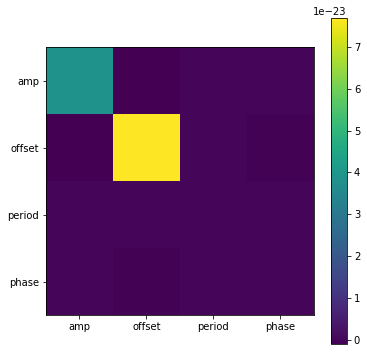

In [60]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

im = ax.imshow(cov)
fig.colorbar(im)

ax.set_yticklabels(['amp','offset','period','phase'])
ax.set_yticks([0,1,2,3])

ax.set_xticklabels(['amp','offset','period','phase'])
ax.set_xticks([0,1,2,3]);

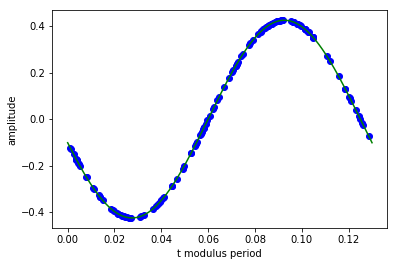

In [107]:
plt.figure(figsize=(6,4))

plt.plot((t % period), mag, 'bo')

t_toplot_modT = plt.linspace(0, period, 1000)
plt.plot(t_toplot_modT, Sin(t_toplot_modT, amp, offset, period, phase), 'g-' )

plt.ylabel('amplitude')
plt.xlabel('t modulus period');

# Note, your function matters.

In [108]:
def line(x, m, b):
    return m*x + b

guess_parameter_values = [1,0]
fit = curve_fit(line, t, mag, guess_parameter_values)
params, cov = fit

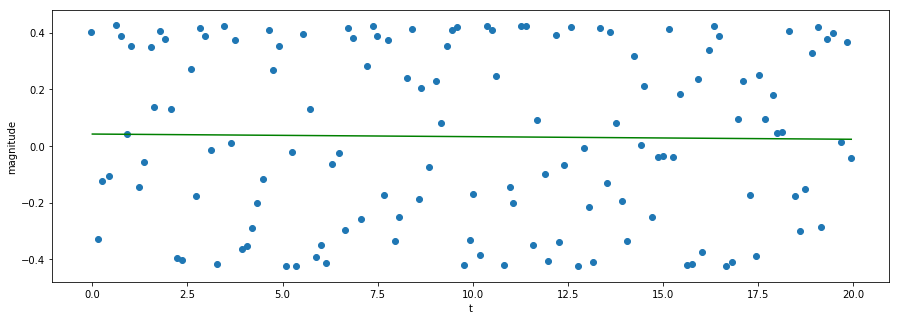

In [109]:
plt.figure(figsize=(15,5))
plt.scatter(t, mag)

m, b = params
plt.plot(t_toplot, line(t_toplot, m, b), 'g-')
plt.xlabel('t')
plt.ylabel('magnitude');